In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [2]:
import importlib
try: 
    importlib.reload(generators)
    importlib.reload(utils)
    importlib.reload(trainers)
    importlib.reload(u_net)
    print("libs reloaded")
except:
    import generators
    import trainers
    import utils
    import u_net
    print("libs imported")

TrainerUNET = trainers.TrainerUNET

libs imported


# UNET

In [3]:
# directorys with data and to store training checkpoints and logs
WORKING_DIR = Path(r"C:\Users\marti\OneDrive - TU Eindhoven\Documenten\Master\Q3\Capita Selecta\Project")
DATA_DIR = WORKING_DIR / "Data"
PROGRESS_DIR = WORKING_DIR / "progress_unet"
PROGRESS_DIR.mkdir(parents=True, exist_ok=True)
VAE_WEIGHTS = WORKING_DIR / "progress_vae" / "exp" / "model.pth"
VAEGAN_WEIGHTS = WORKING_DIR / "progress_vaegan" / "exp" / "model.pth"

# training settings and hyperparameters
NO_VALIDATION_PATIENTS = 3
IMAGE_SIZE = [64, 64]  # images are made smaller to save training time
N = 15
train_size = N-NO_VALIDATION_PATIENTS
seed = 0
N_EPOCHS = 100
DECAY_LR_AFTER = 50
LEARNING_RATE = 1e-4
TOLERANCE = 0.01  # for early stopping
DISPLAY_FREQ = 5
Number_of_fake  = 5
BATCH_SIZE = 32 - Number_of_fake
exp = str(N_EPOCHS) + '_epochs_' + str(Number_of_fake) + "_number_of_fake"
EXPERIMENT_DIR = PROGRESS_DIR / exp
EXPERIMENT_DIR.mkdir(parents=True, exist_ok=True)

patients = [
    path
    for path in DATA_DIR.glob("*")
    if not any(part.startswith(".") for part in path.parts)
]

train_indx, valid_indx = train_test_split(patients, random_state=seed, train_size=train_size)

# split in training/validation after shuffling
partition = {
    "train": train_indx,
    "validation": valid_indx,
}

mask_generator = generators.VAE
# mask_generator.load_state_dict(torch.load(VAE_WEIGHTS))
# mask_generator.eval()

image_generator = generators.VAEGAN
# image_generator.load_state_dict(torch.load(VAEGAN_WEIGHTS))
# image_generator.eval()

# load training data and create DataLoader with batching and shuffling
train_set = utils.ProstateMRDataset(partition["train"], IMAGE_SIZE)
train_loader = DataLoader(
    train_set,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    pin_memory=True,
)

# load validation data
valid_set = utils.ProstateMRDataset(partition["validation"], IMAGE_SIZE)
valid_loader = DataLoader(
    valid_set,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    pin_memory=True,
)

def lambda_lr(the_epoch):
    return (
        1.0
        if the_epoch < DECAY_LR_AFTER
        else 1 - float(the_epoch - DECAY_LR_AFTER) / (N_EPOCHS - DECAY_LR_AFTER)
    )

# initialise model, optimiser, and loss function
unet_model = u_net.UNet(num_classes=1).to(device)
optimizer = torch.optim.Adam(unet_model.parameters(), lr=LEARNING_RATE)

u_net_trainer = TrainerUNET(net=unet_model, 
                            optimizer=optimizer, 
                            progress_dir=EXPERIMENT_DIR, 
                            train_loader=train_loader, 
                            valid_loader=valid_loader, 
                            mask_generator=mask_generator,
                            image_generator=image_generator,
                            RATIO=RATIO,
                            CHECKPOINTS_DIR=EXPERIMENT_DIR, 
                            device=device) 

In [4]:
u_net_trainer.train(N_EPOCHS, 1, lambda_lr=lambda_lr)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #000: DiceBCELoss/train = 1.462 | DiceBCELoss/valid = 1.176


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #001: DiceBCELoss/train = 1.129 | DiceBCELoss/valid = 1.053


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #002: DiceBCELoss/train = 1.003 | DiceBCELoss/valid = 1.013


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #003: DiceBCELoss/train = 0.870 | DiceBCELoss/valid = 0.962


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #004: DiceBCELoss/train = 0.704 | DiceBCELoss/valid = 0.982


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #005: DiceBCELoss/train = 0.577 | DiceBCELoss/valid = 0.791


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #006: DiceBCELoss/train = 0.490 | DiceBCELoss/valid = 0.703


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #007: DiceBCELoss/train = 0.452 | DiceBCELoss/valid = 0.710


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #008: DiceBCELoss/train = 0.409 | DiceBCELoss/valid = 0.605


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #009: DiceBCELoss/train = 0.392 | DiceBCELoss/valid = 0.712


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #010: DiceBCELoss/train = 0.377 | DiceBCELoss/valid = 0.585


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #011: DiceBCELoss/train = 0.372 | DiceBCELoss/valid = 0.594


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #012: DiceBCELoss/train = 0.341 | DiceBCELoss/valid = 0.570


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #013: DiceBCELoss/train = 0.324 | DiceBCELoss/valid = 0.517


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #014: DiceBCELoss/train = 0.302 | DiceBCELoss/valid = 0.478


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #015: DiceBCELoss/train = 0.290 | DiceBCELoss/valid = 0.506


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #016: DiceBCELoss/train = 0.278 | DiceBCELoss/valid = 0.443


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #017: DiceBCELoss/train = 0.272 | DiceBCELoss/valid = 0.490


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #018: DiceBCELoss/train = 0.265 | DiceBCELoss/valid = 0.459


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #019: DiceBCELoss/train = 0.257 | DiceBCELoss/valid = 0.434


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #020: DiceBCELoss/train = 0.243 | DiceBCELoss/valid = 0.407


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #021: DiceBCELoss/train = 0.240 | DiceBCELoss/valid = 0.436


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #022: DiceBCELoss/train = 0.231 | DiceBCELoss/valid = 0.418


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #023: DiceBCELoss/train = 0.217 | DiceBCELoss/valid = 0.439


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #024: DiceBCELoss/train = 0.214 | DiceBCELoss/valid = 0.434


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #025: DiceBCELoss/train = 0.211 | DiceBCELoss/valid = 0.401


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #026: DiceBCELoss/train = 0.202 | DiceBCELoss/valid = 0.409


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #027: DiceBCELoss/train = 0.209 | DiceBCELoss/valid = 0.403


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #028: DiceBCELoss/train = 0.198 | DiceBCELoss/valid = 0.403


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #029: DiceBCELoss/train = 0.184 | DiceBCELoss/valid = 0.399


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #030: DiceBCELoss/train = 0.179 | DiceBCELoss/valid = 0.409


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #031: DiceBCELoss/train = 0.175 | DiceBCELoss/valid = 0.397


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #032: DiceBCELoss/train = 0.169 | DiceBCELoss/valid = 0.433


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #033: DiceBCELoss/train = 0.167 | DiceBCELoss/valid = 0.430


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #034: DiceBCELoss/train = 0.162 | DiceBCELoss/valid = 0.411


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #035: DiceBCELoss/train = 0.161 | DiceBCELoss/valid = 0.393


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #036: DiceBCELoss/train = 0.157 | DiceBCELoss/valid = 0.395


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #037: DiceBCELoss/train = 0.149 | DiceBCELoss/valid = 0.389


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #038: DiceBCELoss/train = 0.147 | DiceBCELoss/valid = 0.373


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #039: DiceBCELoss/train = 0.137 | DiceBCELoss/valid = 0.396


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #040: DiceBCELoss/train = 0.141 | DiceBCELoss/valid = 0.424


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #041: DiceBCELoss/train = 0.139 | DiceBCELoss/valid = 0.406


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #042: DiceBCELoss/train = 0.127 | DiceBCELoss/valid = 0.408


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #043: DiceBCELoss/train = 0.119 | DiceBCELoss/valid = 0.428


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #044: DiceBCELoss/train = 0.116 | DiceBCELoss/valid = 0.397


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #045: DiceBCELoss/train = 0.114 | DiceBCELoss/valid = 0.412


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #046: DiceBCELoss/train = 0.110 | DiceBCELoss/valid = 0.399


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #047: DiceBCELoss/train = 0.112 | DiceBCELoss/valid = 0.405


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch #048: DiceBCELoss/train = 0.122 | DiceBCELoss/valid = 0.410


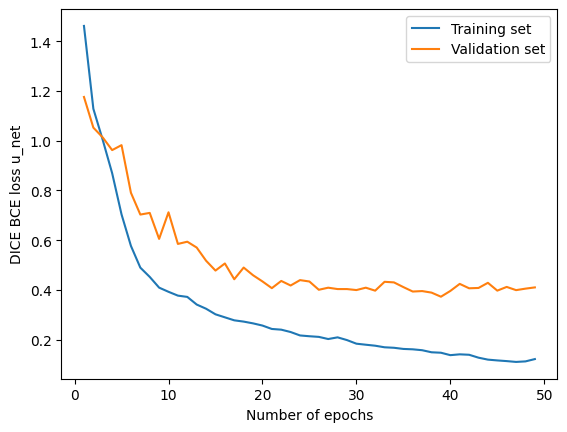

In [5]:
plt.plot(range(1, len(u_net_trainer.train_losses[0])+1), u_net_trainer.train_losses[0])
plt.plot(range(1, len(u_net_trainer.train_losses[0])+1), u_net_trainer.valid_losses[0])
plt.xlabel('Number of epochs')
plt.ylabel('DICE BCE loss u_net')
plt.legend(['Training set', 'Validation set'])
plot_name = 'DICE_BCE_LOSS_'+ str(N_EPOCHS) + '_epochs_' + str(RATIO) + '_ratio.png'
path = EXPERIMENT_DIR / plot_name

plt.savefig(path, dpi=200)